## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 18
---------------------------------------

GOALS:

1. Practice Logistic Regression
2. Interpret Logistic Regression Results

----------------------------------------------------------


This homework has **1 Exercise** and **1 Challenge Exercise**

### Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours: Duke 209 <a href="https://joannabieri.com/schedule.html"> Click Here for Joanna's Schedule</a>


### Announcements

**Come to Lab!** If you need help we are here to help!

### Day 18 Assignment - same drill.

1. Make sure you can **Fork** and **Clone** the Day18 repo from [Redlands-DATA101](https://github.com/Redlands-DATA101)
2. Open the file Day18-HW.ipynb and start doing the problems.
    * You can do these problems as you follow along with the lecture notes and video.
3. Get as far as you can before class.
4. Submit what you have so far **Commit** and **Push** to Git.
5. Take the daily check in quiz on **Canvas**.
7. Come to class with lots of questions!

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn import metrics

### Data: A collection of Emails

- Emails for the first three months of 2012 for an email account
- Data from 3921 emails and 21 variables on them
- Outcome: whether the email is spam or not
- Predictors: number of characters, whether the email had "Re:" in the subject, time at which email was sent, number of times the word "inherit" shows up in the email, etc.


Data Information: https://www.openintro.org/data/index.php?data=email

This lab follows the Data Science in a Box units "Unit 4 - Deck 6: Logistic regression" by Mine Çetinkaya-Rundel. It has been updated for our class and translated to Python by Joanna Bieri.

In [164]:
file_name = 'data/email.csv'
DF = pd.read_csv(file_name)

In [166]:
DF

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,2012-01-01T06:16:41Z,0,0,0,no,...,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,2012-01-01T07:03:59Z,0,0,0,no,...,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,2012-01-01T16:00:32Z,0,0,4,no,...,0,0,7.773,192,1,0,0,0,6,small
3,0,0,1,0,0,2012-01-01T09:09:49Z,0,0,0,no,...,0,0,13.256,255,1,0,0,0,48,small
4,0,0,1,0,0,2012-01-01T10:00:01Z,0,0,0,no,...,0,2,1.231,29,0,0,0,0,1,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,1,0,1,0,0,2012-03-31T00:03:45Z,0,0,0,no,...,0,0,0.332,12,0,0,0,0,0,small
3917,1,0,1,0,0,2012-03-31T14:13:19Z,0,0,1,no,...,0,0,0.323,15,0,0,0,0,0,small
3918,0,1,1,0,0,2012-03-30T16:20:33Z,0,0,0,no,...,0,0,8.656,208,1,0,0,0,5,small
3919,0,1,1,0,0,2012-03-28T16:00:49Z,0,0,0,no,...,0,0,10.185,132,0,0,0,0,0,small


**Exercise 1** Logistic Regression with ONE explanatory variable.

Choose another variable from the data set to use as your explanatory variable and create a Logistic Regression model to predict if an email is spam or not. You should do all of the following:

1. Say what variable you are using to predict spam messages (do some analysis, at minimum a value_counts()). Why do you think this is a good variable to use in predicting if an email is spam.
2. Create and fit a Logistic Regression model.
3. Show the results: intercept, coefficient, basic confusion matrix prediction.
4. What do you think the decision cutoff should be? Update the cutoff and redo the confusion matrix.
5. Explain your results in words. You should talk about False Negative and False positive rates and what they mean in terms of the variables you chose.


**Exercise 2 - challenge** Logistic Regression with MORE THAN ONE explanatory variable.

Try redoing the analysis, but this time add a few more explanatory variables. Again do some analysis of the variables you are chosing and state why they are a good choice. Then answer again questions 1-5.

My work: 

Exercise 1 Logistic Regression with ONE explanatory variable.

Choose another variable from the data set to use as your explanatory variable and create a Logistic Regression model to predict if an email is spam or not. You should do all of the following:

In [130]:
DF.columns

Index(['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'time', 'image',
       'attach', 'dollar', 'winner', 'inherit', 'viagra', 'password',
       'num_char', 'line_breaks', 'format', 're_subj', 'exclaim_subj',
       'urgent_subj', 'exclaim_mess', 'number'],
      dtype='object')

In [132]:
#1 Say what variable you are using to predict spam messages (do some analysis, at minimum a value_counts()). 
#Why do you think this is a good variable to use in predicting if an email is spam.
DF['dollar'].value_counts()

dollar
0    3554
1     367
Name: count, dtype: int64

In [134]:
DF[['dollar','spam']].groupby('spam').describe()

dollar                                   
       count mean  std  min  25%  50%  75%  max
spam                                           
0     3554.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1      367.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

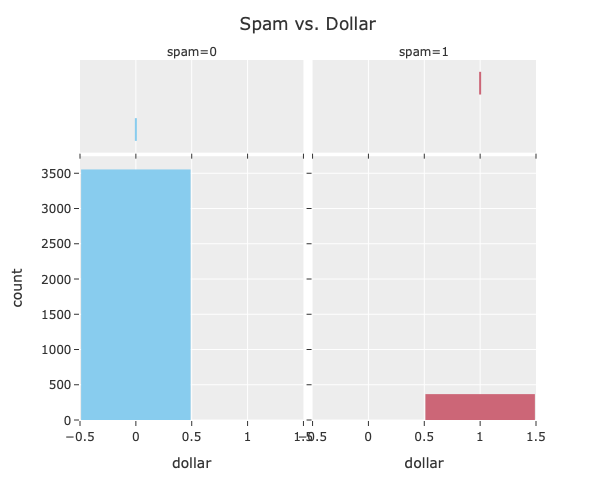

In [136]:
fig = px.histogram(DF,
                   x='dollar',
                   color='spam',
                   facet_col='spam',
                   marginal="box",
                   color_discrete_sequence=px.colors.qualitative.Safe)


fig.update_layout(template="ggplot2",
                  bargap=0.02,
                  title='Spam vs. Dollar',
                  title_x=0.5,
                  showlegend=False,
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

This is a good variable because emails containing the word 'dollar' might be spam as they often include financial scams or offers.

In [139]:
#1
DF_ex = DF[['dollar','spam']]

In [141]:
#2 Create and fit a Logistic Regression model.
X = DF_ex['dollar'].values.reshape(-1,1)
y = DF_ex['spam']

# Do the regression
LM = LogisticRegression()
LM.fit(X,y)



LogisticRegression()

In [143]:
#3 Show the results: intercept, coefficient, basic confusion matrix prediction.
print('Classes:')
print(LM.classes_)
print('Coefficients:')
print(LM.coef_)
print('Intercept:')
print(LM.intercept_)

DF_ex['dollar'] = LM.predict(X)
y_pred = DF_ex['dollar'].values

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

Classes:
[0 1]
Coefficients:
[[9.56343892]]
Intercept:
[-5.91317526]


array([[3554,    0],
       [   0,  367]])

In [145]:
DF_ex[['prob not spam','prob spam']] = LM.predict_proba(X)
DF_ex

,dollar,spam,prob not spam,prob spam
0,0,0,0.997304,0.002696
1,0,0,0.997304,0.002696
2,0,0,0.997304,0.002696
3,0,0,0.997304,0.002696
4,0,0,0.997304,0.002696
...,...,...,...,...
3916,1,1,0.025326,0.974674
3917,1,1,0.025326,0.974674
3918,0,0,0.997304,0.002696
3919,0,0,0.997304,0.002696


In [212]:
#4 What do you think the decision cutoff should be? Update the cutoff and redo the confusion matrix.
DF_ex[['prob not spam','prob spam']] = LM.predict_proba(X)
cutoff = .3 


DF_ex['new_prediction'] = DF_ex['prob spam'].apply(lambda x: 1 if x>cutoff else 0)

DF_ex

,dollar,spam,prob not spam,prob spam,new_prediction
0,0,0,0.997304,0.002696,0
1,0,0,0.997304,0.002696,0
2,0,0,0.997304,0.002696,0
3,0,0,0.997304,0.002696,0
4,0,0,0.997304,0.002696,0
...,...,...,...,...,...
3916,1,1,0.025326,0.974674,1
3917,1,1,0.025326,0.974674,1
3918,0,0,0.997304,0.002696,0
3919,0,0,0.997304,0.002696,0


In [214]:
y_pred = DF_ex['new_prediction'].values

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[3554,    0],
       [   0,  367]])

In [216]:
#5 Explain your results in words. You should talk about False Negative and False positive 
#rates and what they mean in terms of the variables you chose.

In [218]:
TP = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TN = cnf_matrix[1,1]

print('False Negative Rate:')
print(FN/ (TP+FN))
print('------')
print('False Positive Rate:')
print(FP/ (FP+TN))
print('------')
print('Sensitivity:')
print(1 - (FN/ (TP+FN)))
print('------')
print('Specificity:')
print(1- (FP/ (FP+TN)))

False Negative Rate:
0.0
------
False Positive Rate:
0.0
------
Sensitivity:
1.0
------
Specificity:
1.0


False negative means an email not spam and it was labeled spam. This happened in 0% of cases where the email was not spam.

False positive means that am email was spam and was labeled not spam. This happened in 0% of the cases where the email was spam.

If the email was not spam it has a 1% probability of being labeled not spam.

If the email was spam it has a 1% probability of being labeled spam.

Exercise 2 - challenge Logistic Regression with MORE THAN ONE explanatory variable.

Try redoing the analysis, but this time add a few more explanatory variables. Again do some analysis of the variables you are chosing and state why they are a good choice. Then answer again questions 1-5.

In [222]:
DF.columns

Index(['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'time', 'image',
       'attach', 'dollar', 'winner', 'inherit', 'viagra', 'password',
       'num_char', 'line_breaks', 'format', 're_subj', 'exclaim_subj',
       'urgent_subj', 'exclaim_mess', 'number'],
      dtype='object')

In [224]:
#1 Say what variable you are using to predict spam messages (do some analysis, at minimum a value_counts()).
#Why do you think this is a good variable to use in predicting if an email is spam.

In [226]:
DF['image'].value_counts()

image
0     3811
1       76
2       17
3       11
5        2
4        2
20       1
9        1
Name: count, dtype: int64

In [228]:
DF['re_subj'].value_counts()

re_subj
0    2896
1    1025
Name: count, dtype: int64

In [230]:
DF[['image', 're_subj']].describe()

,image,re_subj
count,3921.000000,3921.000000
mean,0.048457,0.261413
std,0.450848,0.439460
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,20.000000,1.000000


In [232]:
DF[['image','spam','re_subj']].groupby('spam').describe()

image                                               re_subj            \
       count      mean       std  min  25%  50%  75%   max   count      mean   
spam                                                                           
0     3554.0  0.052898  0.472746  0.0  0.0  0.0  0.0  20.0  3554.0  0.286156   
1      367.0  0.005450  0.073720  0.0  0.0  0.0  0.0   1.0   367.0  0.021798   

                                         
           std  min  25%  50%  75%  max  
spam                                     
0     0.452027  0.0  0.0  0.0  1.0  1.0  
1     0.146224  0.0  0.0  0.0  0.0  1.0

In [234]:
DF_ex2 = DF[['image','spam','re_subj']]

I chose these variables because the presence of images is common in spam emails and the presence of "Re:" in the subject could indicate genuine conversations (non-spam).

In [251]:
#2 Create and fit a Logistic Regression model.
X = DF_ex2[['image','spam','re_subj']].values.reshape(-1,3)
y = DF_ex2['spam']

# Do the regression
LM = LogisticRegression()
LM.fit(X,y)


LogisticRegression()

In [247]:
#3 Show the results: intercept, coefficient, basic confusion matrix prediction.

In [257]:
print('Classes:')
print(LM.classes_)
print('Coefficients:')
print(LM.coef_)
print('Intercept:')
print(LM.intercept_)

DF_ex2['prediction_new'] = LM.predict(X)
y_pred = DF_ex2['prediction_new'].values

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

Classes:
[0 1]
Coefficients:
[[-0.2758847   9.38995706 -0.93020997]]
Intercept:
[-5.71107555]


array([[3554,    0],
       [   0,  367]])

In [259]:
DF_ex2[['prob not spam','prob spam']] = LM.predict_proba(X)
DF_ex2

,image,spam,re_subj,prediction_new,prob not spam,prob spam
0,0,0,0,0,0.996702,0.003298
1,0,0,0,0,0.996702,0.003298
2,0,0,0,0,0.996702,0.003298
3,0,0,0,0,0.996702,0.003298
4,0,0,0,0,0.996702,0.003298
...,...,...,...,...,...,...
3916,0,1,0,1,0.024629,0.975371
3917,0,1,0,1,0.024629,0.975371
3918,0,0,0,0,0.996702,0.003298
3919,0,0,0,0,0.996702,0.003298


In [261]:
#4 What do you think the decision cutoff should be? Update the cutoff and redo the confusion matrix.


In [263]:
DF_ex2[['prob not spam','prob spam']] = LM.predict_proba(X)
cutoff = .1 


DF_ex2['new_prediction'] = DF_ex2['prob spam'].apply(lambda x: 1 if x>cutoff else 0)

DF_ex2

,image,spam,re_subj,prediction_new,prob not spam,prob spam,new_prediction
0,0,0,0,0,0.996702,0.003298,0
1,0,0,0,0,0.996702,0.003298,0
2,0,0,0,0,0.996702,0.003298,0
3,0,0,0,0,0.996702,0.003298,0
4,0,0,0,0,0.996702,0.003298,0
...,...,...,...,...,...,...,...
3916,0,1,0,1,0.024629,0.975371,1
3917,0,1,0,1,0.024629,0.975371,1
3918,0,0,0,0,0.996702,0.003298,0
3919,0,0,0,0,0.996702,0.003298,0


In [265]:
y_pred = DF_ex2['new_prediction'].values

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[3554,    0],
       [   0,  367]])

In [267]:
#5 Explain your results in words. You should talk about False Negative and False positive 
#rates and what they mean in terms of the variables you chose.

In [269]:
TP = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TN = cnf_matrix[1,1]

print('False Negative Rate:')
print(FN/ (TP+FN))
print('------')
print('False Positive Rate:')
print(FP/ (FP+TN))
print('------')
print('Sensitivity:')
print(1 - (FN/ (TP+FN)))
print('------')
print('Specificity:')
print(1- (FP/ (FP+TN)))

False Negative Rate:
0.0
------
False Positive Rate:
0.0
------
Sensitivity:
1.0
------
Specificity:
1.0


Adding more variables improves the model's ability to distinguish spam from non-spam but may lead to overfitting. Each variable contributes to the prediction, but interactions should be carefully analyzed. A lower cutoff captures more spam but risks more false positives.
